<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/collection-of-models/(LEGIT)_MODEL_BUILDING_ONLY_DiabetesNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/Diabetes-Detection-Model/master/diabetes.csv')

# Renaming DiabetesPedigreeFunction as DPF
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})



In [ ]:
# Handling columns with zeroes

features = df.columns
cols = (df[features] == 0).sum()
print(cols)

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome          500
dtype: int64


In [ ]:
# Replacing zeroes with NaN except for no. of pregnancies and outcome

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
#Replace the null values with the median of that column:

df['Glucose'].fillna(df['Glucose'].median(), inplace =True)

df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace =True)

df['BMI'].fillna(df['BMI'].median(), inplace =True)

df['Insulin'].fillna(df['Insulin'].median(), inplace =True)

df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace =True)


In [ ]:
# Model Building
from sklearn.model_selection import train_test_split
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
# Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)

# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)

# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)

# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)

# Artificial Neural Network
from sklearn.neural_network import MLPClassifier
nm_model = MLPClassifier(hidden_layer_sizes=(128,128))

# Models List
models = [classifier, logreg, knn, svc
          ]

In [ ]:
# TRAIN DATA ACCURACY TEST

for m in models:
  print("\n",m.fit(X_train, y_train))
  print(m.score(X_train, y_train))



 RandomForestClassifier(n_estimators=10)
0.9837133550488599

 LogisticRegression(random_state=42)
0.7671009771986971

 KNeighborsClassifier(n_neighbors=24)
0.762214983713355


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



 SVC(kernel='linear', random_state=42)
0.762214983713355


In [ ]:
# TEST DATA ACCURACY TEST

for m in models:
  print("\n",m.fit(X_test, y_test))
  print(m.score(X_test, y_test))


 RandomForestClassifier(n_estimators=10)
0.987012987012987

 LogisticRegression(random_state=42)
0.8311688311688312

 KNeighborsClassifier(n_neighbors=24)
0.7597402597402597


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



 SVC(kernel='linear', random_state=42)
0.8506493506493507


In [ ]:
# JOBLIB TEST

import joblib

print("Test Data")
for m in models:
  modName = str(m)
  joblib.dump(m, modName)
  model = joblib.load(str(m))
  laptopmodel = model.predict([[0,162,76,56,100,53.2,0.759,25]])
  print(str(m), laptopmodel)




Test Data
RandomForestClassifier(n_estimators=10) [1]
LogisticRegression(random_state=42) [1]
KNeighborsClassifier(n_neighbors=24) [1]
SVC(kernel='linear', random_state=42) [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


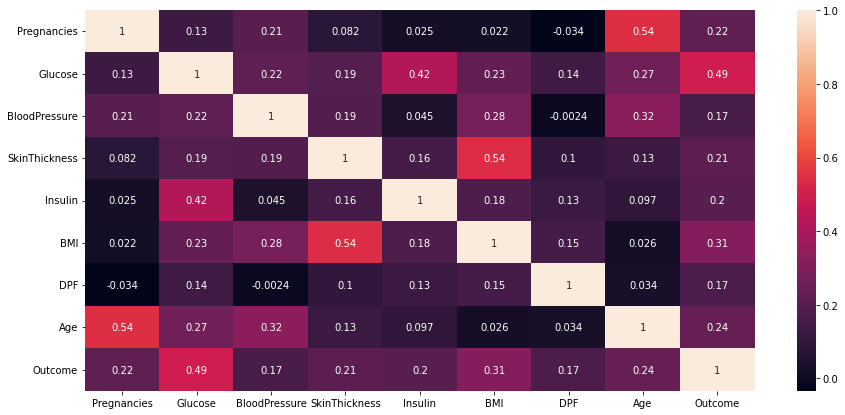

In [ ]:
plt.figure(figsize= (15, 7))
sns.heatmap(df.corr(),annot= True)